# Regularização

In [1]:
import torch
from torch import nn
from dataset import load_fashion_mnist_small
import train

class Model(nn.Module):
    def __init__(self):
        super().__init__()

        self.layers = nn.Sequential(
            nn.Linear(28*28, 16),
            nn.Linear(16, 16),
            nn.Linear(16, 16),
            nn.Linear(16, 10)
        )

    def forward(self, x):
        x = x.reshape(x.shape[0], -1)
        return self.layers(x)

# Dataset fashion MNIST com apenas 1 imagem por classe no conjunto de treinamento
ds_train, ds_valid = load_fashion_mnist_small(n_train=10)


### Treinamento com overfit

0 2.26 2.22 0.13
1 2.01 2.15 0.18
2 1.79 2.07 0.21
3 1.58 1.99 0.24
4 1.37 1.93 0.28
5 1.18 1.87 0.33
6 1.01 1.82 0.38
7 0.86 1.78 0.43
8 0.73 1.76 0.48
9 0.61 1.75 0.50
10 0.51 1.76 0.51
11 0.42 1.78 0.50
12 0.34 1.81 0.49
13 0.28 1.85 0.47
14 0.23 1.89 0.46
15 0.19 1.94 0.46
16 0.16 1.98 0.45
17 0.13 2.02 0.45
18 0.11 2.07 0.45
19 0.09 2.10 0.45
20 0.08 2.14 0.45
21 0.07 2.18 0.44
22 0.06 2.21 0.44
23 0.05 2.24 0.44
24 0.05 2.27 0.44
25 0.04 2.29 0.44
26 0.04 2.32 0.44
27 0.04 2.35 0.44
28 0.03 2.37 0.44
29 0.03 2.39 0.44


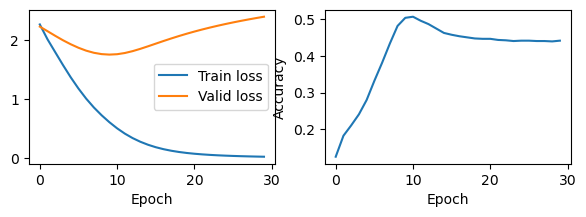

In [2]:
torch.random.manual_seed(0)
model = Model()

logger = train.train(model, ds_train, ds_valid, bs=10, num_epochs=30, lr=0.1, 
                     weight_decay=0., verbose=True)
train.plot_log(logger)

### Regularização L2 (weight decay)

0 2.26 2.23 0.12
1 2.04 2.17 0.18
2 1.90 2.13 0.18
3 1.79 2.09 0.19
4 1.69 2.05 0.22
5 1.61 2.02 0.25
6 1.53 1.98 0.31
7 1.46 1.95 0.34
8 1.40 1.92 0.37
9 1.35 1.90 0.40
10 1.30 1.87 0.40
11 1.26 1.85 0.42
12 1.23 1.83 0.43
13 1.19 1.81 0.43
14 1.16 1.79 0.44
15 1.14 1.78 0.44
16 1.12 1.76 0.44
17 1.10 1.75 0.44
18 1.08 1.74 0.45
19 1.06 1.73 0.45
20 1.04 1.72 0.46
21 1.03 1.71 0.46
22 1.01 1.71 0.47
23 1.00 1.70 0.47
24 0.99 1.70 0.47
25 0.97 1.70 0.48
26 0.97 1.70 0.48
27 0.96 1.70 0.48
28 0.95 1.70 0.48
29 0.94 1.70 0.47


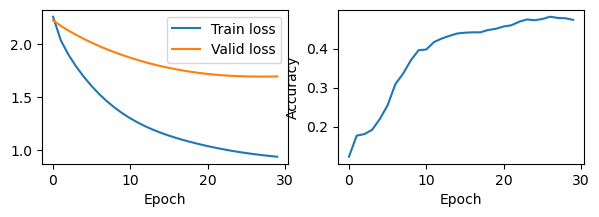

In [3]:
torch.random.manual_seed(0)
model = Model()

logger = train.train(model, ds_train, ds_valid, bs=10, num_epochs=30, lr=0.1, 
                     weight_decay=0.4, verbose=True)
train.plot_log(logger)

### Efeito de regularização do batch size

Treinamento a rede com um batch size menor também possui um efeito de regularização

0 2.27 2.26 0.11
1 2.15 2.22 0.14
2 2.04 2.18 0.16
3 1.91 2.14 0.18
4 1.81 2.09 0.20
5 1.69 2.05 0.21
6 1.60 2.01 0.22
7 1.49 1.98 0.25
8 1.39 1.94 0.28
9 1.29 1.90 0.31
10 1.21 1.86 0.34
11 1.12 1.83 0.37
12 1.05 1.80 0.40
13 0.97 1.78 0.43
14 0.90 1.76 0.44
15 0.84 1.75 0.45
16 0.77 1.74 0.48
17 0.69 1.73 0.48
18 0.65 1.73 0.49
19 0.60 1.72 0.50
20 0.54 1.71 0.50
21 0.50 1.72 0.50
22 0.45 1.71 0.52
23 0.40 1.73 0.52
24 0.37 1.74 0.52
25 0.34 1.77 0.49
26 0.30 1.79 0.49
27 0.27 1.80 0.48
28 0.25 1.81 0.47
29 0.22 1.84 0.47


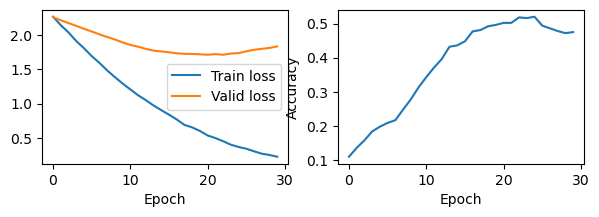

In [4]:
torch.random.manual_seed(0)
model = Model()

logger = train.train(model, ds_train, ds_valid, bs=2, num_epochs=30, lr=0.01, 
                     weight_decay=0., verbose=True)
train.plot_log(logger)

### Dropout

#### Entendendo a camada Dropout

In [5]:
p = 0.5
drop = nn.Dropout(p)
x = torch.tensor([1, 2, 3, 4, 5, 6], dtype=torch.float32)
y = drop(x)
print(y)

tensor([2., 0., 0., 0., 0., 0.])


In [6]:
# Remove os mesmos valores que a camada Dropout acima
x_drop = x*(y>0)
# Reescala os valores
yc = x_drop/(1-p)
print(yc)

tensor([2., 0., 0., 0., 0., 0.])


In [7]:
drop.eval()
y = drop(x)
print(y)

tensor([1., 2., 3., 4., 5., 6.])


#### Adicionando Dropout ao modelo

É útil adicionar o dropout logo antes da camada de classificação (última camada). A ideia é a seguinte: o dropout evita que a camada de classificação use sempre os mesmos atributos extraídos para fazer a classificação das imagens. 

Dropout possui uma analogia com a técnica de boosting em machine learning. Para a rede ter boa performance, ela precisa ter diversas "subredes" que classificam bem as imagens, pois atributos são aleatoriamente apagados. 

0 2.31 2.19 0.16
1 1.97 2.15 0.20
2 1.87 2.05 0.25
3 2.01 2.03 0.27
4 1.46 1.90 0.30
5 1.19 1.90 0.34
6 1.22 1.89 0.38
7 1.45 1.87 0.43
8 1.13 1.80 0.43
9 1.11 1.77 0.48
10 1.17 1.70 0.44
11 0.67 1.77 0.42
12 0.91 1.72 0.48
13 1.10 1.72 0.45
14 1.31 1.62 0.52
15 0.90 1.66 0.50
16 0.94 1.72 0.46
17 0.62 1.77 0.48
18 0.35 1.77 0.47
19 0.86 1.99 0.43
20 0.24 1.87 0.47
21 0.24 1.98 0.45
22 0.22 1.92 0.46
23 0.64 1.79 0.51
24 0.62 1.83 0.47
25 0.42 1.78 0.49
26 0.42 1.92 0.43
27 0.36 1.97 0.44
28 0.16 1.98 0.44
29 0.07 1.97 0.46


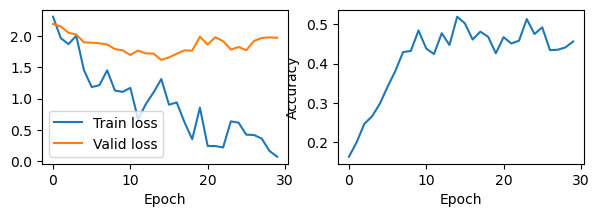

In [8]:
class ModelDrop(nn.Module):
    def __init__(self):
        super().__init__()

        self.layers = nn.Sequential(
            nn.Linear(28*28, 16),
            nn.Linear(16, 16),
            nn.Linear(16, 16),
            nn.Dropout(0.5),
            nn.Linear(16, 10)
        )

    def forward(self, x):
        x = x.reshape(x.shape[0], -1)
        return self.layers(x)

torch.random.manual_seed(0)
model = ModelDrop()

logger = train.train(model, ds_train, ds_valid, bs=10, num_epochs=30, lr=0.1, 
                     weight_decay=0., verbose=True)
train.plot_log(logger)

### Aumento de dados

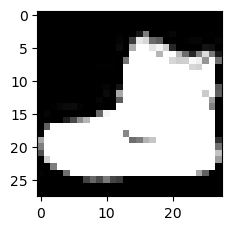

In [9]:
from functools import partial
from dataset import augment_mnist
import matplotlib.pyplot as plt

ds_train.transform = partial(augment_mnist, mean=73., std=81.7)
plt.imshow(ds_train[0][0][0], 'gray')

0 2.27 2.20 0.23
1 2.04 2.12 0.31
2 2.06 2.06 0.35
3 1.90 2.07 0.19
4 1.81 1.91 0.31
5 1.77 1.89 0.35
6 1.52 1.75 0.40
7 1.50 1.77 0.35
8 1.31 1.65 0.47
9 1.32 1.58 0.50
10 0.97 1.57 0.44
11 0.95 1.57 0.43
12 1.05 1.56 0.42
13 0.86 1.65 0.49
14 0.98 1.64 0.47
15 0.83 1.62 0.46
16 0.95 1.59 0.49
17 0.57 1.59 0.48
18 0.38 1.53 0.52
19 0.52 1.69 0.47
20 1.01 1.60 0.50
21 0.80 1.61 0.52
22 0.42 1.61 0.52
23 0.38 1.62 0.50
24 0.50 1.75 0.51
25 0.30 1.80 0.50
26 0.34 1.74 0.51
27 0.35 1.68 0.55
28 0.27 1.66 0.53
29 0.34 1.73 0.51


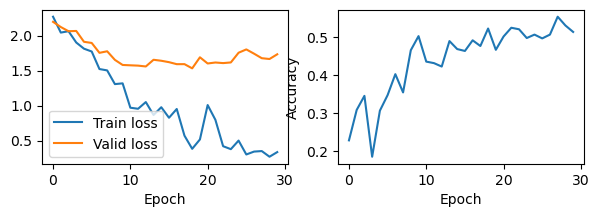

In [10]:
torch.random.manual_seed(0)
model = Model()

logger = train.train(model, ds_train, ds_valid, bs=10, num_epochs=30, lr=0.1, 
                     weight_decay=0., verbose=True)
train.plot_log(logger)

0 2.37 2.26 0.14
1 2.35 2.20 0.15
2 2.09 2.16 0.27
3 2.21 2.08 0.30
4 1.84 2.07 0.31
5 1.95 1.94 0.37
6 2.00 1.88 0.40
7 1.91 1.82 0.42
8 2.12 1.91 0.42
9 1.78 1.90 0.42
10 1.70 1.78 0.39
11 2.02 1.76 0.45
12 1.72 1.67 0.47
13 1.78 1.61 0.47
14 1.61 1.68 0.45
15 1.21 1.59 0.47
16 1.24 1.65 0.44
17 1.76 1.85 0.40
18 1.09 1.52 0.49
19 1.51 1.48 0.49
20 1.18 1.42 0.55
21 1.18 1.47 0.49
22 0.84 1.45 0.51
23 1.09 1.45 0.50
24 0.89 1.46 0.54
25 1.10 1.45 0.55
26 0.85 1.44 0.55
27 0.87 1.45 0.54
28 1.03 1.35 0.57
29 0.87 1.37 0.58


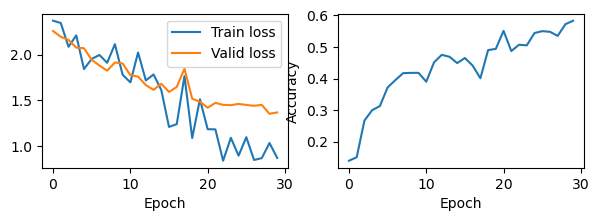

In [11]:
torch.random.manual_seed(0)
model = ModelDrop()

logger = train.train(model, ds_train, ds_valid, bs=2, num_epochs=30, lr=0.02, 
                     weight_decay=0.001, verbose=True)
train.plot_log(logger)